In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("data-2021-09-08 09:27:33.268884")

In [3]:
df.head()

,name,date,content
0,이*미,2021-09-08 00:17,코로나로 여행 못가는건 정말 엄청난 스트레스지만 그 덕분에 검진을 받고 위암을 발견...
1,장*원,2021-09-08 00:00,60세가 지나고 은퇴를 하니 그동안 여행을 만족하게 해보지 못해 백신도 맞고해서내년...
2,류*영,2021-09-07 23:57,코로나 이후로 여행 못 가서 아쉬워요ㅠㅠ 코로나 이전에는 친구들이나 가족들과 함께 ...
3,강*선,2021-09-07 23:55,엄마랑 제주여행을 한번 떠나고 싶다!
4,조*배,2021-09-07 23:48,"올해로 결혼 21주년을 맞이해서 사랑하는 와이프에게 고맙고, 미안하단 말을 여행을 ..."


In [4]:
df.shape

(1701, 3)

In [5]:
# 결측치
df.isnull().sum()

name       0
date       0
content    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     1701 non-null   object
 1   date     1701 non-null   object
 2   content  1701 non-null   object
dtypes: object(3)
memory usage: 40.0+ KB


In [7]:
df['content'][0]

'코로나로 여행 못가는건 정말 엄청난 스트레스지만 그 덕분에 검진을 받고 위암을 발견했어요 암진단 자체로도 충격이긴한데 그나마 초기라 긍정적으로 생각하고 치료받았어요 그러던중 복통이 심해서 병원 갔다가 담낭절제술을 받았는데 담석이 196개나 나왔구요... 건강상 여러문제가 있었지만 긴시간동안 치료하면서 극복중이에요 꼴보기 싫은 코로나지만 덕분에 검진도 받고 치료하고 건강을 되돌아볼수 있는 시간을 가져서 좋다고 생각하고 사는데, 하~이젠 여행 가고 싶어요 여행가서 콧바람 쐬고 기분도 up 시키고~~싶네요 노랑풍선 통해서 행복하고 즐거운 추억 남길수 있었으면 좋겠어요 ^^'

In [8]:
df['content'][100]

'삼남매의 아빠입니다. 막내가 기저귀를 떼면 모든 가족이 기다리던 해외여행을 떠나기로 약속하고 예매까지 했었는데 코로나가 터지면서 모두 캔슬되고 말았네요. 어서 여행길이 열려서 행복한 가족여행 떠나고 싶어요.'

In [9]:
# 전처리

import re
from pykospacing import Spacing
spacing = Spacing()

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub(' ', text)
    result = spacing(result)

    return result

In [10]:
apply_regular_expression(df['content'][602])

'해외여행 갈 때 노랑 풍선 계속 흥해라 울아들 장가 갈 때도 노랑 풍선'

In [11]:
from konlpy.tag import Hannanum, Komoran
from collections import Counter

In [12]:
tagger = Hannanum()  # 명사 형태소 추출 함수
index = 3
print(df['content'][index])
print('--------------------------------------------------------')
print(apply_regular_expression(df['content'][index] + '' + df['content'][index+1]))

nouns = tagger.nouns(apply_regular_expression(df['content'][index] + '' + df['content'][index+1]))
nouns

엄마랑 제주여행을 한번 떠나고 싶다!
--------------------------------------------------------
엄마랑 제주 여행을 한 번 떠나고 싶다 올해로 결혼 주년을 맞이 해서 사랑하는 와이프에게 고맙고 미안 하단 말을 여행을 통해 전하고 싶습니다 곧 결혼기념일 이 다가오는데 결혼할 당시에 했던 약속을 제대로 지키지 못한 것 같아 늘 안타까운 마음이 앞서 네요 어느새 훌쩍 커버린 아들과 함께한 우리 부부의 지난 일을 생각해보니 고생은 추억이 되고 웃음은 행복이 된  것 같습니다 그런 아내에게 결혼 기념일을 빙자한 근사 한 여행을 통해 저의 애틋한 마음을 꼭 전하고 싶습니다


['엄마',
 '제주',
 '여행',
 '번',
 '올해',
 '결혼',
 '주년',
 '맞이',
 '사랑',
 '와이프에',
 '미안',
 '말',
 '여행',
 '결혼기념일',
 '결혼',
 '당시',
 '약속',
 '것',
 '마음',
 '네요',
 '아들',
 '우리',
 '부부',
 '일',
 '생각',
 '고생',
 '추억',
 '웃음',
 '행복',
 '것',
 '아내',
 '결혼',
 '기념일',
 '빙자',
 '근사',
 '여행',
 '저',
 '애틋',
 '마음']

In [13]:
total_nouns = []
start = 0
end = 1
while True:
    if (start == df.shape[0]):
        break
    print('--------------------------------------------')
    print(f'--------------{start} to {end} processing---')
    print('--------------------------------------------')

    corpus = " ".join(df['content'][start:end].tolist())
    nouns = tagger.nouns(apply_regular_expression(corpus))
    total_nouns += nouns
    start = end
    end = end + 10
    if (end > df.shape[0]):
        end = df.shape[0]
    

--------------------------------------------
--------------0 to 1 processing---
--------------------------------------------
--------------------------------------------
--------------1 to 11 processing---
--------------------------------------------
--------------------------------------------
--------------11 to 21 processing---
--------------------------------------------
--------------------------------------------
--------------21 to 31 processing---
--------------------------------------------
--------------------------------------------
--------------31 to 41 processing---
--------------------------------------------
--------------------------------------------
--------------41 to 51 processing---
--------------------------------------------
--------------------------------------------
--------------51 to 61 processing---
--------------------------------------------
--------------------------------------------
--------------61 to 71 processing---
--------------------------------

--------------------------------------------
--------------641 to 651 processing---
--------------------------------------------
--------------------------------------------
--------------651 to 661 processing---
--------------------------------------------
--------------------------------------------
--------------661 to 671 processing---
--------------------------------------------
--------------------------------------------
--------------671 to 681 processing---
--------------------------------------------
--------------------------------------------
--------------681 to 691 processing---
--------------------------------------------
--------------------------------------------
--------------691 to 701 processing---
--------------------------------------------
--------------------------------------------
--------------701 to 711 processing---
--------------------------------------------
--------------------------------------------
--------------711 to 721 processing---
-------------

--------------------------------------------
--------------1281 to 1291 processing---
--------------------------------------------
--------------------------------------------
--------------1291 to 1301 processing---
--------------------------------------------
--------------------------------------------
--------------1301 to 1311 processing---
--------------------------------------------
--------------------------------------------
--------------1311 to 1321 processing---
--------------------------------------------
--------------------------------------------
--------------1321 to 1331 processing---
--------------------------------------------
--------------------------------------------
--------------1331 to 1341 processing---
--------------------------------------------
--------------------------------------------
--------------1341 to 1351 processing---
--------------------------------------------
--------------------------------------------
--------------1351 to 1361 processing-

In [14]:
len(total_nouns)

39846

In [15]:
counter = Counter(total_nouns)

In [16]:
remove = ['코','년','풍선','수','것','저', '노랑', '주년', '노랑풍선','번', '나','전','때','기','지','월','곳','중','시','로','날',
          '후', '저희','우리','데','내','이','대','한','앞','세','거','여','축', '두', '들','적', '등' , '둘', '말', '속','바', '분','ㅠ',
          'ㅠㅠ','라','을', '몇', '어','의','살','줄','도','해','ㅎㅎ', '만','글','리','듯','위','초','되','그','부','남'
          ,'ㅎ', '뿐','ㅜㅜ','를', '밖', '디', '숨','겸','유','고','뭐', '여행', '코로나','때문']
for w in remove:
    try:
        counter.pop(w)
    except:
        pass
counter.most_common(1000)

[('가족', 342),
 ('일', 329),
 ('마음', 310),
 ('엄마', 268),
 ('시간', 245),
 ('추억', 237),
 ('결혼', 237),
 ('해외여행', 220),
 ('생각', 193),
 ('기회', 182),
 ('집', 171),
 ('올해', 169),
 ('남편', 160),
 ('아들', 151),
 ('행복', 142),
 ('부모님', 138),
 ('해외', 134),
 ('감사', 132),
 ('제주', 129),
 ('어머니', 124),
 ('이벤트', 124),
 ('국내', 119),
 ('이번', 118),
 ('사랑', 116),
 ('아내', 112),
 ('사람', 112),
 ('유럽', 110),
 ('축하', 110),
 ('계획', 109),
 ('작년', 109),
 ('일상', 107),
 ('아이', 106),
 ('아이들', 103),
 ('동안', 101),
 ('딸', 100),
 ('삶', 95),
 ('한번', 93),
 ('당첨', 91),
 ('선물', 91),
 ('가족들', 89),
 ('휴가', 89),
 ('생활', 89),
 ('환갑', 89),
 ('자유', 88),
 ('지금', 80),
 ('상황', 79),
 ('시작', 79),
 ('예약', 79),
 ('내년', 78),
 ('부부', 78),
 ('친구', 77),
 ('아버지', 77),
 ('하루', 77),
 ('꿈', 77),
 ('몸', 76),
 ('힐링', 75),
 ('호텔', 74),
 ('그동안', 73),
 ('기념', 72),
 ('첫', 72),
 ('고생', 71),
 ('여행사', 67),
 ('어디', 66),
 ('종식', 65),
 ('준비', 65),
 ('아빠', 65),
 ('가지', 64),
 ('비행기', 64),
 ('진심', 63),
 ('기억', 62),
 ('마지막', 61),
 ('신혼여행', 60),
 ('답답', 60),
 ('건강', 5

In [17]:
one_len_word = []

for c in counter:
    if len(c[0]) == 1:
        one_len_word.append(c[0])

In [18]:
len(one_len_word)

5611

In [19]:
counter.most_common(9999999999999999)

[('가족', 342),
 ('일', 329),
 ('마음', 310),
 ('엄마', 268),
 ('시간', 245),
 ('추억', 237),
 ('결혼', 237),
 ('해외여행', 220),
 ('생각', 193),
 ('기회', 182),
 ('집', 171),
 ('올해', 169),
 ('남편', 160),
 ('아들', 151),
 ('행복', 142),
 ('부모님', 138),
 ('해외', 134),
 ('감사', 132),
 ('제주', 129),
 ('어머니', 124),
 ('이벤트', 124),
 ('국내', 119),
 ('이번', 118),
 ('사랑', 116),
 ('아내', 112),
 ('사람', 112),
 ('유럽', 110),
 ('축하', 110),
 ('계획', 109),
 ('작년', 109),
 ('일상', 107),
 ('아이', 106),
 ('아이들', 103),
 ('동안', 101),
 ('딸', 100),
 ('삶', 95),
 ('한번', 93),
 ('당첨', 91),
 ('선물', 91),
 ('가족들', 89),
 ('휴가', 89),
 ('생활', 89),
 ('환갑', 89),
 ('자유', 88),
 ('지금', 80),
 ('상황', 79),
 ('시작', 79),
 ('예약', 79),
 ('내년', 78),
 ('부부', 78),
 ('친구', 77),
 ('아버지', 77),
 ('하루', 77),
 ('꿈', 77),
 ('몸', 76),
 ('힐링', 75),
 ('호텔', 74),
 ('그동안', 73),
 ('기념', 72),
 ('첫', 72),
 ('고생', 71),
 ('여행사', 67),
 ('어디', 66),
 ('종식', 65),
 ('준비', 65),
 ('아빠', 65),
 ('가지', 64),
 ('비행기', 64),
 ('진심', 63),
 ('기억', 62),
 ('마지막', 61),
 ('신혼여행', 60),
 ('답답', 60),
 ('건강', 5

In [20]:
dd = pd.DataFrame(counter.most_common(9999999), columns=['keyword','count'])
dd.to_csv('output.csv')

In [21]:
import matplotlib.font_manager

Text(0, 0.5, 'Frequency')

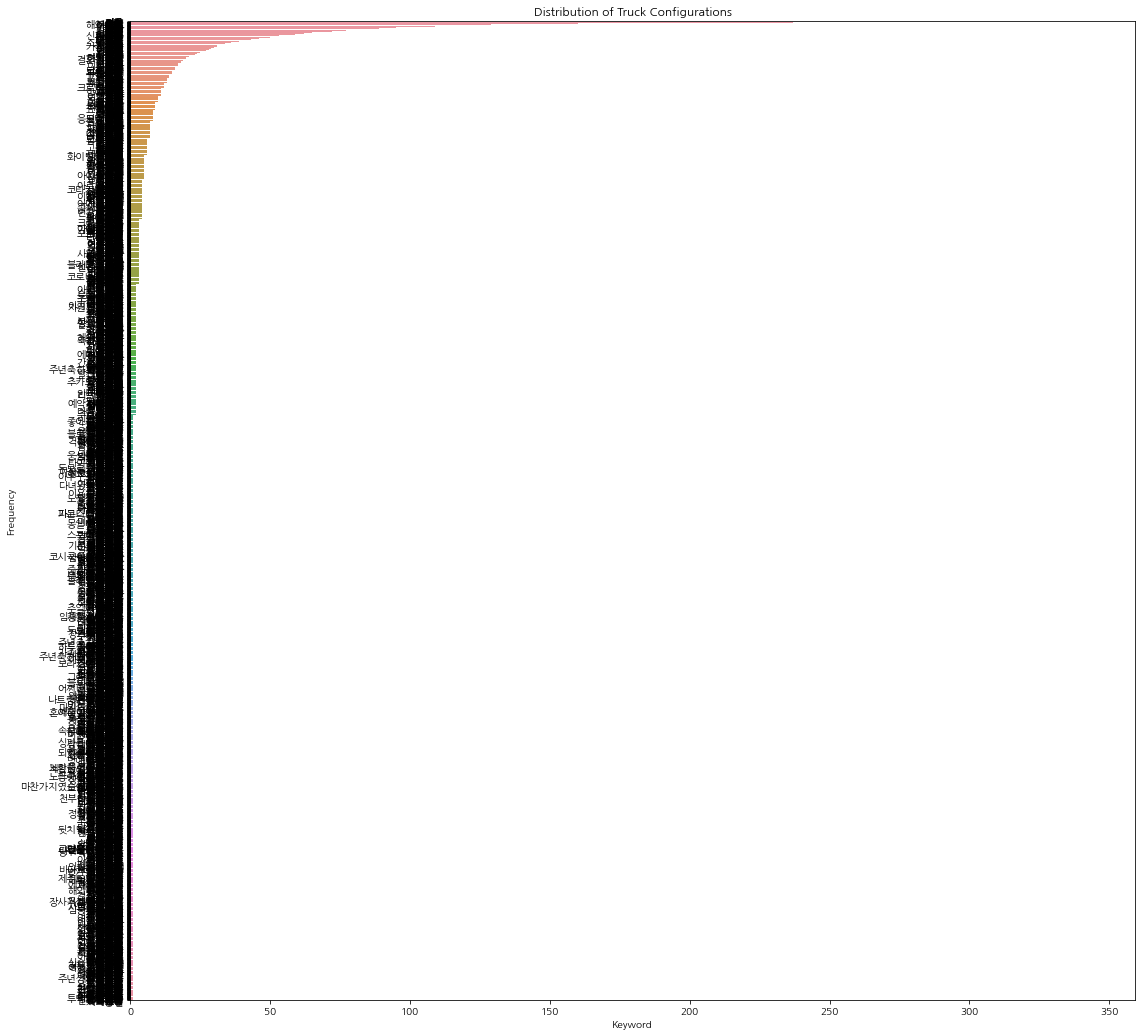

In [22]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(2^16,2^16))
ax = sns.barplot(x='count',y='keyword', data=dd)
plt.title('Distribution of Truck Configurations')
plt.xlabel('Keyword')
plt.ylabel('Frequency')


In [23]:
fig = ax.get_figure()
fig.savefig('output.png')